In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_samples(N = 100):
    np.random.seed(21)
    X = np.random.normal(0, 1, N)
    y = X + 2*np.random.normal(0, 0.5, N) + 3
    return X, y
    

In [277]:
def get_model(learning_rate=1):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1, input_shape=(1,)))
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=learning_rate), loss='mse')
#     model.load_weights('bad_start.hdf5')
    model.set_weights([np.array([[4]]), np.array([-1])])
    return model

In [373]:
def plot_data(X, y, loss, beta_0s, beta_1s, mse_beta_0s, mse_beta_1s, ax):
    x_line = np.linspace(-4, 4, 100)
    beta_0_range = np.linspace(-1, 6, 100)
    beta_1_range = np.linspace(-2, 4, 100)
    
    
    ax= ax.T.reshape(-1)
    ax[0].scatter(X, y, label='Observaciones')
    ax[0].plot(x_line, model.predict(x_line), color='r', label='Recta estimada')
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('y')

    ax[1].plot(loss)
    ax[1].set_title('MSE')
    ax[0].legend()


    ax[2].plot(beta_0s)
    ax[2].set_title('Beta 0')
    ax[3].plot(beta_1s)
    ax[3].set_title('Beta 1')



    ax[4].plot(beta_0_range, [np.mean((y - (X*beta_1 + b))**2) for b in beta_0_range])
    ax[4].plot(beta_0s, mse_beta_0s)
    ax[4].scatter(beta_0s, mse_beta_0s)

    ax[5].plot(beta_1_range, [np.mean((y - (X*b + beta_0))**2) for b in beta_1_range])


    ax[5].plot(beta_1s, mse_beta_1s)
    ax[5].scatter(beta_1s, mse_beta_1s)

In [374]:
def get_coefs(model):
    beta_1 = model.weights[0].numpy()[0][0]
    beta_0 = model.weights[1].numpy()[0]
    return beta_0, beta_1

In [375]:
model.save_weights('bad_start.hdf5')

In [394]:
X, y = get_samples()
model = get_model(learning_rate=0.75)

In [395]:
loss = [model.evaluate(X, y, verbose=0)]
beta_0, beta_1 = get_coefs(model)
beta_0s = [beta_0]
beta_1s = [beta_1]
mse_beta_0 = np.mean((y - (X*beta_1 + beta_0))**2)
mse_beta_0s = [mse_beta_0]
mse_beta_1 = np.mean((y - (X*beta_1 + beta_0))**2)
mse_beta_1s = [mse_beta_1]

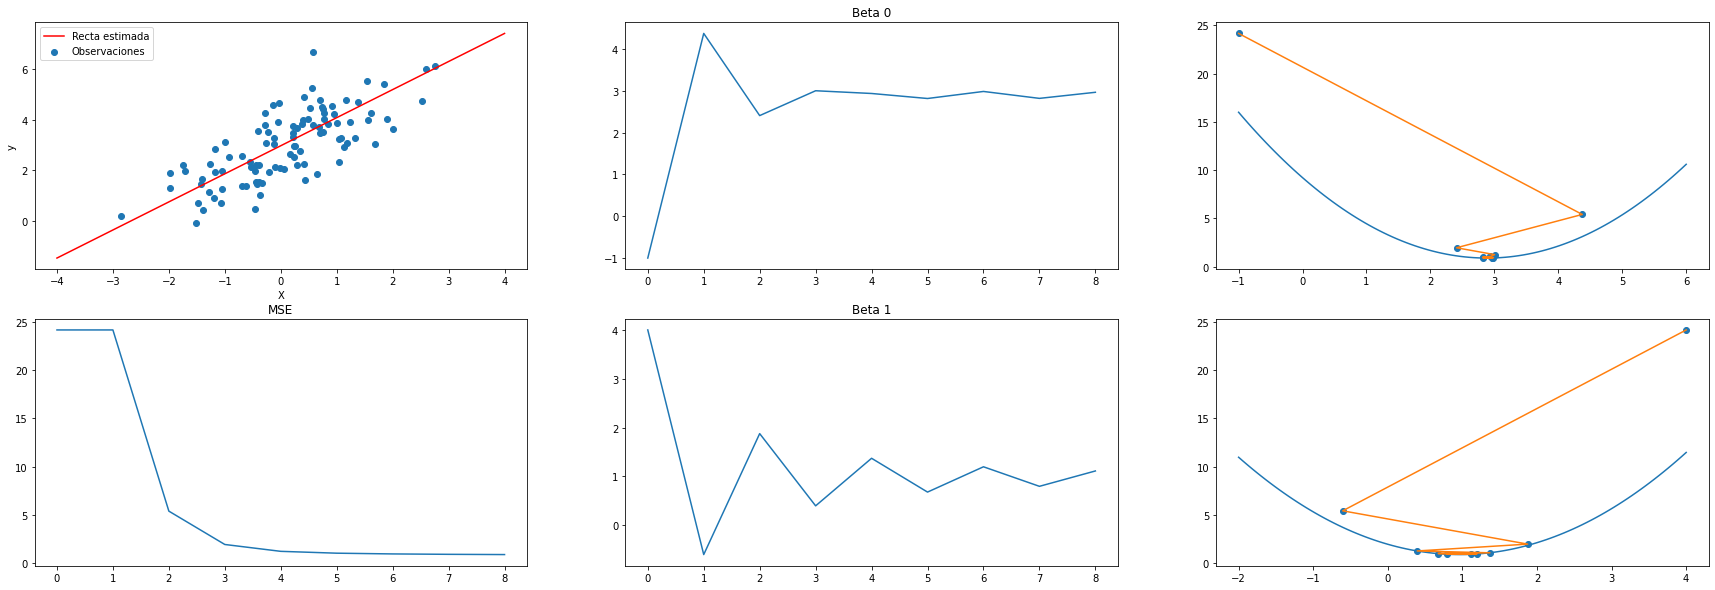

In [404]:
f, ax = plt.subplots(2, 3, figsize=(30, 10))
plot_data(X, y, loss, beta_0s, beta_1s, mse_beta_0s, mse_beta_1s, ax)


history = model.fit(X, y, epochs=1, verbose=0, batch_size=len(X))
beta_0, beta_1 = get_coefs(model)
beta_0s.append(beta_0)
beta_1s.append(beta_1)
mse_beta_0 = np.mean((y - (X*beta_1 + beta_0))**2)
mse_beta_0s.append(mse_beta_0)
mse_beta_1 = np.mean((y - (X*beta_1 + beta_0))**2)
mse_beta_1s.append(mse_beta_1)
loss.append(history.history['loss'][0])

In [29]:
beta_0_range + 1*beta_1

array([0.95815688, 1.00866193, 1.05916698, 1.10967204, 1.16017709,
       1.21068214, 1.26118719, 1.31169224, 1.36219729, 1.41270234,
       1.46320739, 1.51371244, 1.56421749, 1.61472254, 1.66522759,
       1.71573264, 1.76623769, 1.81674274, 1.86724779, 1.91775284,
       1.96825789, 2.01876294, 2.06926799, 2.11977305, 2.1702781 ,
       2.22078315, 2.2712882 , 2.32179325, 2.3722983 , 2.42280335,
       2.4733084 , 2.52381345, 2.5743185 , 2.62482355, 2.6753286 ,
       2.72583365, 2.7763387 , 2.82684375, 2.8773488 , 2.92785385,
       2.9783589 , 3.02886395, 3.079369  , 3.12987406, 3.18037911,
       3.23088416, 3.28138921, 3.33189426, 3.38239931, 3.43290436,
       3.48340941, 3.53391446, 3.58441951, 3.63492456, 3.68542961,
       3.73593466, 3.78643971, 3.83694476, 3.88744981, 3.93795486,
       3.98845991, 4.03896496, 4.08947002, 4.13997507, 4.19048012,
       4.24098517, 4.29149022, 4.34199527, 4.39250032, 4.44300537,
       4.49351042, 4.54401547, 4.59452052, 4.64502557, 4.69553

In [597]:
model.evaluate(X, y)

4/4 [==============================] - 0s 863us/step - loss: 0.9050


0.9049888849258423

In [600]:
model.predict(np.array([1, 2, 1.4]).reshape(-1, 1))

array([[3.7147484],
       [4.7006006],
       [4.1090894]], dtype=float32)

In [602]:
np.array([1, 2, 1.4]).reshape(-1, 1)

array([[1. ],
       [2. ],
       [1.4]])